# Performing Validation of generating LMN coordinate transformation matrix
Date Created: 24-Oct-2025

Date Modified: 24-Oct-2025

Author: Regis John

In [1]:
import pyspedas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trange = ['2015-12-09/05:03:55', '2015-12-09/05:03:59']

In [3]:
fgm_vars = pyspedas.mms.fgm(trange=trange, probe=1, data_rate='brst',
                            varformat='mms1_fgm_b_gse_brst_l2')

30-Oct-25 16:54:20: Loading files for group: probe: 1, drate: brst, level: l2, datatype: , after sorting and filtering:
30-Oct-25 16:54:20: /Users/rejohn/Data_Speedas/mms/mms1/fgm/brst/l2/2015/12/09/mms1_fgm_brst_l2_20151209050044_v4.22.0.cdf
30-Oct-25 16:54:20: /Users/rejohn/Data_Speedas/mms/mms1/fgm/brst/l2/2015/12/09/mms1_fgm_brst_l2_20151209050044_v4.22.0.cdf


In [4]:
fgm_vars

['mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gse_brst_l2_bvec',
 'mms1_fgm_b_gse_brst_l2_btot']

In [5]:
from pyspedas import minvar_matrix_make

minvar_matrix_make(
    in_var_name='mms1_fgm_b_gse_brst_l2_bvec',  # or GSM if that's your input frame
    tstart='2015-12-09/05:03:56.5',
    tstop='2015-12-09/05:03:57.2',
    tslide=0,     # single matrix
)


30-Oct-25 16:54:30: store_data: Neither data array nor newname supplied, nothing to do.


['mms1_fgm_b_gse_brst_l2_bvec_mva_mat']

In [6]:
from pytplot import get_data

times, lmn_matrix = get_data('mms1_fgm_b_gse_brst_l2_bvec_mva_mat')

In [7]:
lmn_matrix

array([[[ 0.11008219,  0.59222133, -0.7982204 ],
        [-0.36703702,  0.77055795,  0.52107991],
        [ 0.92366971,  0.23561482,  0.30219186]]])

## Resolving LMN Sign Ambiguity (MVA in GSE)

The eigen vectors L, M, and N from minimum variance analysis (MVA) are unique only up to a sign. To align with the LMN system published in Wilder et al. (2017), which expresses vectors in **GSE coordinates**, we fix signs using physical context and directional conventions.

- **N** is explicitly chosen to point outward from the magnetopause into the magnetosheath, which corresponds to the **positive GSE X direction near magnetic local noon** (Wilder et al., 2017). As noted in Hapgood (1992), “it is necessary to check that N points outward, i.e. away from the object (planet, comet) which supports the boundary.”
- **L** is explicitly chosen to align with the reconnecting magnetic field and lie within the magnetopause plane. Following Hapgood (1992), we ensure **L has a positive projection along the GSE Z-axis**, consistent with the projection of the solar magnetospheric Z direction: “The L direction must lie within the plane defined by the other two eigenvectors but otherwise the choice of direction is arbitrary. One choice is to select the projection of solar magnetospheric Z direction onto this plane.”
- **M** is then defined as `M = N × L` to complete a right-handed system.

The x-component of N is positive so it is pointing outward, so no change needed.

In [8]:
N = lmn_matrix[0][2]

The z-component of L is negative so we reverse the sign of L.

In [9]:
L = - lmn_matrix[0][0]

To ensure right handedness, we reverse the sign of M as well:

In [10]:
M = - lmn_matrix[0][1]

In [11]:
lmn_matrix_corrected = np.vstack([L, M, N])
lmn_matrix_corrected

array([[-0.11008219, -0.59222133,  0.7982204 ],
       [ 0.36703702, -0.77055795, -0.52107991],
       [ 0.92366971,  0.23561482,  0.30219186]])

The LMN coordinate system from the Wilder et al. (2017) study is defined as follows:

In [12]:
L = [-0.104, -0.59, 0.80]
M = [0.38, -0.77, -0.514]
N = [0.920, 0.250, 0.302]

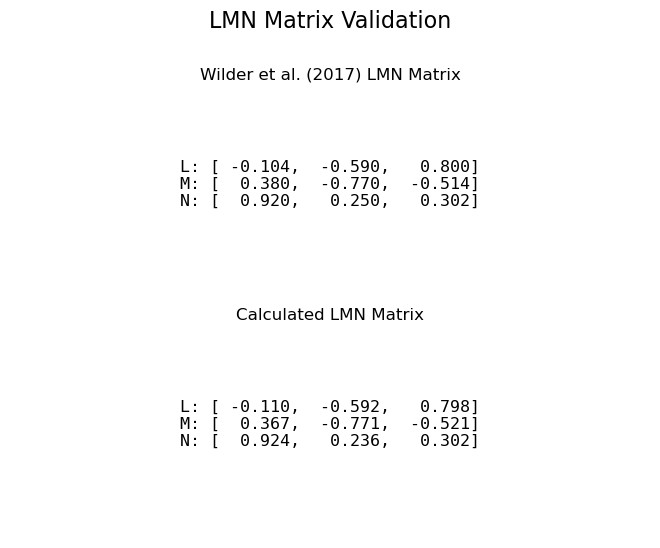

In [46]:
# Create figure with 2 vertically stacked subplots
fig = plt.figure(figsize=(8, 6))

# Create two subplots with specific positions
# [left, bottom, width, height]
ax1 = plt.axes([0.1, 0.5, 0.8, 0.35])
ax2 = plt.axes([0.1, 0.1, 0.8, 0.35])
ax1.axis('off')
ax2.axis('off')

# Round matrices to 3 decimal places
matrix1 = np.around(np.array([L, M, N]), decimals=3)
matrix2 = np.around(lmn_matrix_corrected, decimals=3)

# Function to create matrix string
def matrix_to_string(matrix, row_labels):
    matrix_str = ""
    for i, (row, label) in enumerate(zip(matrix, row_labels)):
        matrix_str += f"{label}: [{row[0]:7.3f}, {row[1]:7.3f}, {row[2]:7.3f}]\n"
    return matrix_str

# Add matrices as text
row_labels = ['L', 'M', 'N']
ax1.text(0.5, 0.5, matrix_to_string(matrix1, row_labels),
         ha='center', va='center', fontfamily='monospace', fontsize=12)
ax2.text(0.5, 0.5, matrix_to_string(matrix2, row_labels),
         ha='center', va='center', fontfamily='monospace', fontsize=12)

# Add titles
ax1.set_title('Wilder et al. (2017) LMN Matrix')
ax2.set_title('Calculated LMN Matrix')

# Add overall title
fig.suptitle('LMN Matrix Validation', fontsize=16, y=0.98)

# Save the figure
plt.savefig('lmn_matrix_validation.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
pyspedas.tplot_names()

0 : mms1_fgm_b_gse_brst_l2
1 : mms1_fgm_b_gse_brst_l2_bvec
2 : mms1_fgm_b_gse_brst_l2_btot
3 : mms1_fgm_b_gse_brst_l2_bvec_mva_mat


['mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gse_brst_l2_bvec',
 'mms1_fgm_b_gse_brst_l2_btot',
 'mms1_fgm_b_gse_brst_l2_bvec_mva_mat']

In [4]:
mec_vars = pyspedas.projects.mms.mec(trange=trange, probe='1', varformat='mms1_mec_r_gsm')

24-Oct-25 17:56:01: Loading files for group: probe: 1, drate: srvy, level: l2, datatype: epht89q, after sorting and filtering:
24-Oct-25 17:56:01: /Users/rejohn/Data_Speedas/mms/mms1/mec/srvy/l2/epht89q/2015/12/mms1_mec_srvy_l2_epht89q_20151209_v2.2.1.cdf


In [5]:
fgm_vars, mec_vars

(['mms1_fgm_b_gsm_brst_l2',
  'mms1_fgm_b_gsm_brst_l2_bvec',
  'mms1_fgm_b_gsm_brst_l2_btot'],
 ['mms1_mec_r_gsm'])

In [9]:
pyspedas.lmn_matrix_make(pos_var_name='mms1_mec_r_gsm', 
        mag_var_name='mms1_fgm_b_gsm_brst_l2_bvec', trange=trange)

24-Oct-25 17:57:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2015/
24-Oct-25 17:57:51: File is current: /Users/rejohn/Data_Speedas/omni/hro_1min/2015/omni_hro_1min_20151201_v01.cdf
24-Oct-25 17:57:51: time_clip: IMF has no data in requested range
24-Oct-25 17:57:51: time_clip: PLS has no data in requested range
24-Oct-25 17:57:51: time_clip: IMF_PTS has no data in requested range
24-Oct-25 17:57:51: time_clip: PLS_PTS has no data in requested range
24-Oct-25 17:57:51: time_clip: percent_interp has no data in requested range
24-Oct-25 17:57:51: time_clip: Timeshift has no data in requested range
24-Oct-25 17:57:51: time_clip: RMS_Timeshift has no data in requested range
24-Oct-25 17:57:51: time_clip: RMS_phase has no data in requested range
24-Oct-25 17:57:51: time_clip: Time_btwn_obs has no data in requested range
24-Oct-25 17:57:51: time_clip: F has no data in requested range
24-Oct-25 17:57:51: time_clip: BX_GSE has no data in requested 

'mms1_fgm_b_gsm_brst_l2_bvec_lmn_mat'

The LMN coordinates for figure 4 of Wilder et al. (2018) is from the following time interval05:03:56.5 to 05:03:57.2 UT in the Wilder et al. (2017).

In [18]:
# Load position data (MEC) in GSM
pyspedas.projects.mms.mec(trange=['2015-12-09', '2015-12-09'], probe='1')

# Load magnetic field data (FGM) in GSM
pyspedas.projects.mms.fgm(trange=['2015-12-09', '2015-12-09'], probe='1', coord='gsm')

24-Oct-25 17:51:22: Searching for local files...
24-Oct-25 17:51:22: No matching CDF versions found.
24-Oct-25 17:51:22: /opt/anaconda3/envs/phy/lib/python3.13/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),

24-Oct-25 17:51:22: /opt/anaconda3/envs/phy/lib/python3.13/ast.py:602: DeprecationWarning: Constant.__init__ got an unexpected keyword argument 's'. Support for arbitrary keyword arguments is deprecated and will be removed in Python 3.15.
  return Constant(*args, **kwargs)

24-Oct-25 17:51:22: /opt/anaconda3/envs/phy/lib/python3.13/ast.py:602: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)

24-Oct-25 17:51:22: /opt/anaconda3/envs/phy/lib/python3.13/ast.py:602: DeprecationWarning: Constant.__init__ missing 1 required positional argument: 'value'. This will become an error

TypeError: mms_load_fgm() got an unexpected keyword argument 'coord'